In [65]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

#### 1. Graphic Illustration of some limit theorems, including   
1) the law of large numbers;   
2) the central limit theorem (VB, Theorem 1.3.2)   
and more.

Define a function that studies the asymptotic behavior of $X_1+...X_N$, where $X_1,...X_N$ are i.i.d random variables withh mean $0$.  In particular, we would like to visualize the behavior of $\frac{X_1+...X_N}{N^{\alpha}}$ for some $\alpha>0$. 

In [70]:
# Define a function:
# Input: 1) a set of sample S with dimension n times m. n represents the number of samples and m represent the size of each sample;
#        2) the parameter alpha.
# Output: a histogram of realizations of (X_1+...+X_N)/N^alpha

def CLT(alpha, S):  
    # plot the distribution with regard to alpha using sns.distplot()
    sns.distplot(np.sum(S, axis = 1) / (S.shape[1] ** alpha))

Now test your function with $\alpha = 1 $ and $\alpha = \frac{1}{2}$ and  
1) $X_i$ has standard normal distribution;  
2) $X_i$ has symmetric Bernoulli distribution;  
3) any other distribution of your preference for $X_i$.

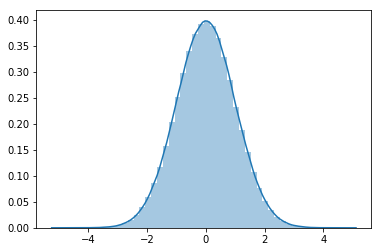

In [71]:
S = np.random.normal(0,1,size = (1000000,10))
plt.show(CLT(0.5,S))

#### 2. Graphic Illustration of the convergence rate in the central limit theorem (VB, Theorem 2.1.3 Berry-Esseen central limit theorem)

Define a function to verify the quantitative central limit theorem by computing and comparing (graphically) the left hand side and right hand side of the theorem. In particular, we wouod like to analyze:
$P(\frac{X_1 + ... + X_N - N \mu}{\sigma \sqrt{N}} > t) -  P(g >t)$, where $g \sim N(0,1)$. We recall that the probability of a random variable to take values in a range can be approximated by the frequencies of observations occurring in this range.  
For simplicity, we would sutdy the case when the random variables $X_i$ are independent Possion(2). 

In [68]:
# Define a function that computes for different N, the difference between 
# Input: t a positive number;
# Output: a graph showing the difference on the left hand side and the bound on the right hand side of Theorem 2.1.3. 
def CLT_diff(t):
    LHS_list = []
    RHS_list = []
    sigma = np.sqrt(2)
    rho = np.mean(np.abs((np.random.poisson(lam = 2, size = 10000) - 2) ** 3)) / sigma ** 3   # generate the constant appearing on the right hand side
    LHSP = 1 - norm.cdf(t)   # compute the tail probability appearing on the right hand side
    # vary N from 2 to 50000 with step size 100, for each N and the given t, draw samples from possion(2) and approximate the probablity of interest on the left hand side: 
    for N in range(2, 5000, 100):
        Zn = (np.mean(np.random.poisson(lam = 2, size = (1000, N)), axis = 1) - 2) / sigma * np.sqrt(N)
        RHSP = np.sum(Zn >= t) / len(Zn)
        RHS = rho / np.sqrt(N)
        LHS_list.append(np.abs(LHSP - RHSP))
        RHS_list.append(RHS)
    # After we get the result for each N, we plot the result
    plt.plot(range(2, 5000, 100), LHS_list, label = "LHS")
    plt.plot(range(2, 5000, 100), RHS_list, label = "RHS")
    plt.xlabel("N")
    plt.legend()


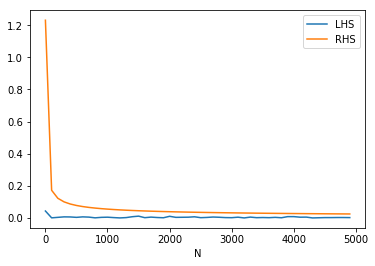

In [69]:
plt.show(CLT_diff(2))